# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import TRAIN.architecture.BERT.bert as bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [4]:
TRAIN_classes = 'all-classes'

data_config = {
  "data_unit" : sup.DATA_S_PF,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 128,
  "PH2" : True,
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : 75,
}

train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "loadable" : bert.BERT_MINI,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 0,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 2500
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, train_config=train_config)

In [6]:
model.df

,class_numeric,h_v1x,h_v1y,h_v1z,h_v2x,h_v2y,h_v2z,h_v3x,h_v3y,h_v3z,...,wh18z,wh19x,wh19y,wh19z,wh20x,wh20y,wh20z,cp_h_mean_x,cp_h_mean_y,cp_h_mean_z
0,28,-0.933604,-0.306442,0.072504,0.127275,-0.562439,0.701702,-0.220629,-0.657333,0.936793,...,-1.257882,0.893439,-0.136876,-1.271532,0.875273,-0.118186,-1.274603,-0.985922,-0.261226,-0.636948
2,28,-0.966571,-0.293215,-0.061806,0.116864,-0.558493,0.594718,-0.225537,-0.726388,0.951400,...,-1.264559,0.896513,-0.090760,-1.275925,0.869412,-0.062770,-1.280561,-1.160675,0.069027,-1.029555
4,28,-1.020573,-0.283374,-0.033118,0.098904,-0.559130,0.585012,-0.195606,-0.737721,0.978297,...,-1.263694,0.862816,-0.128174,-1.275305,0.833517,-0.097242,-1.279474,-1.353039,-0.062025,-0.589741
7,28,-1.042316,-0.282534,0.045798,0.060633,-0.563009,0.625220,-0.172655,-0.700442,0.958261,...,-1.312566,0.882399,-0.192474,-1.327290,0.848730,-0.156373,-1.330539,-1.163705,0.370409,-1.570737
8,28,-1.044504,-0.271994,-0.142885,0.080379,-0.557189,0.525714,-0.228996,-0.776971,0.977695,...,-1.267381,0.899006,-0.122004,-1.276428,0.866337,-0.084453,-1.283671,-1.653586,0.191717,-0.690685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91742,27,-1.002750,-0.289363,0.009281,-0.133337,-0.551981,0.361552,-0.291113,0.070254,-0.739387,...,1.143113,1.188715,-1.440742,1.203419,1.262004,-1.499257,1.171328,0.331595,0.879662,-0.727772
91744,27,-1.213343,-0.228501,-0.173792,-0.276346,-0.541264,0.274905,-0.208034,0.136280,-0.769025,...,1.159215,1.068570,-1.738972,1.213179,1.148036,-1.825068,1.184909,0.221467,0.910312,-0.744357
91746,27,-0.913972,-0.270538,-0.547470,0.006860,-0.522635,0.003941,-0.201046,0.276240,-0.799926,...,1.104986,1.031273,-1.501457,1.148614,1.105648,-1.557298,1.122508,0.316678,0.971017,-0.897975
91747,27,-0.507656,-0.336723,-0.441088,0.401804,-0.492691,0.078358,-0.261919,0.263263,-0.879729,...,1.022969,0.975790,-0.871241,1.052814,1.045045,-0.889093,1.028633,0.522411,1.089137,-1.191118


In [7]:
model.fit(verbose=True)

In [8]:
model.test()
model.full_score()

0.9284417387589448
0.9676385773790451
0.9284882280482993
0.9286950595940774
0.9287980001420011


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:205: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.loss_fig.show()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:247: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.confusion_fig.show()


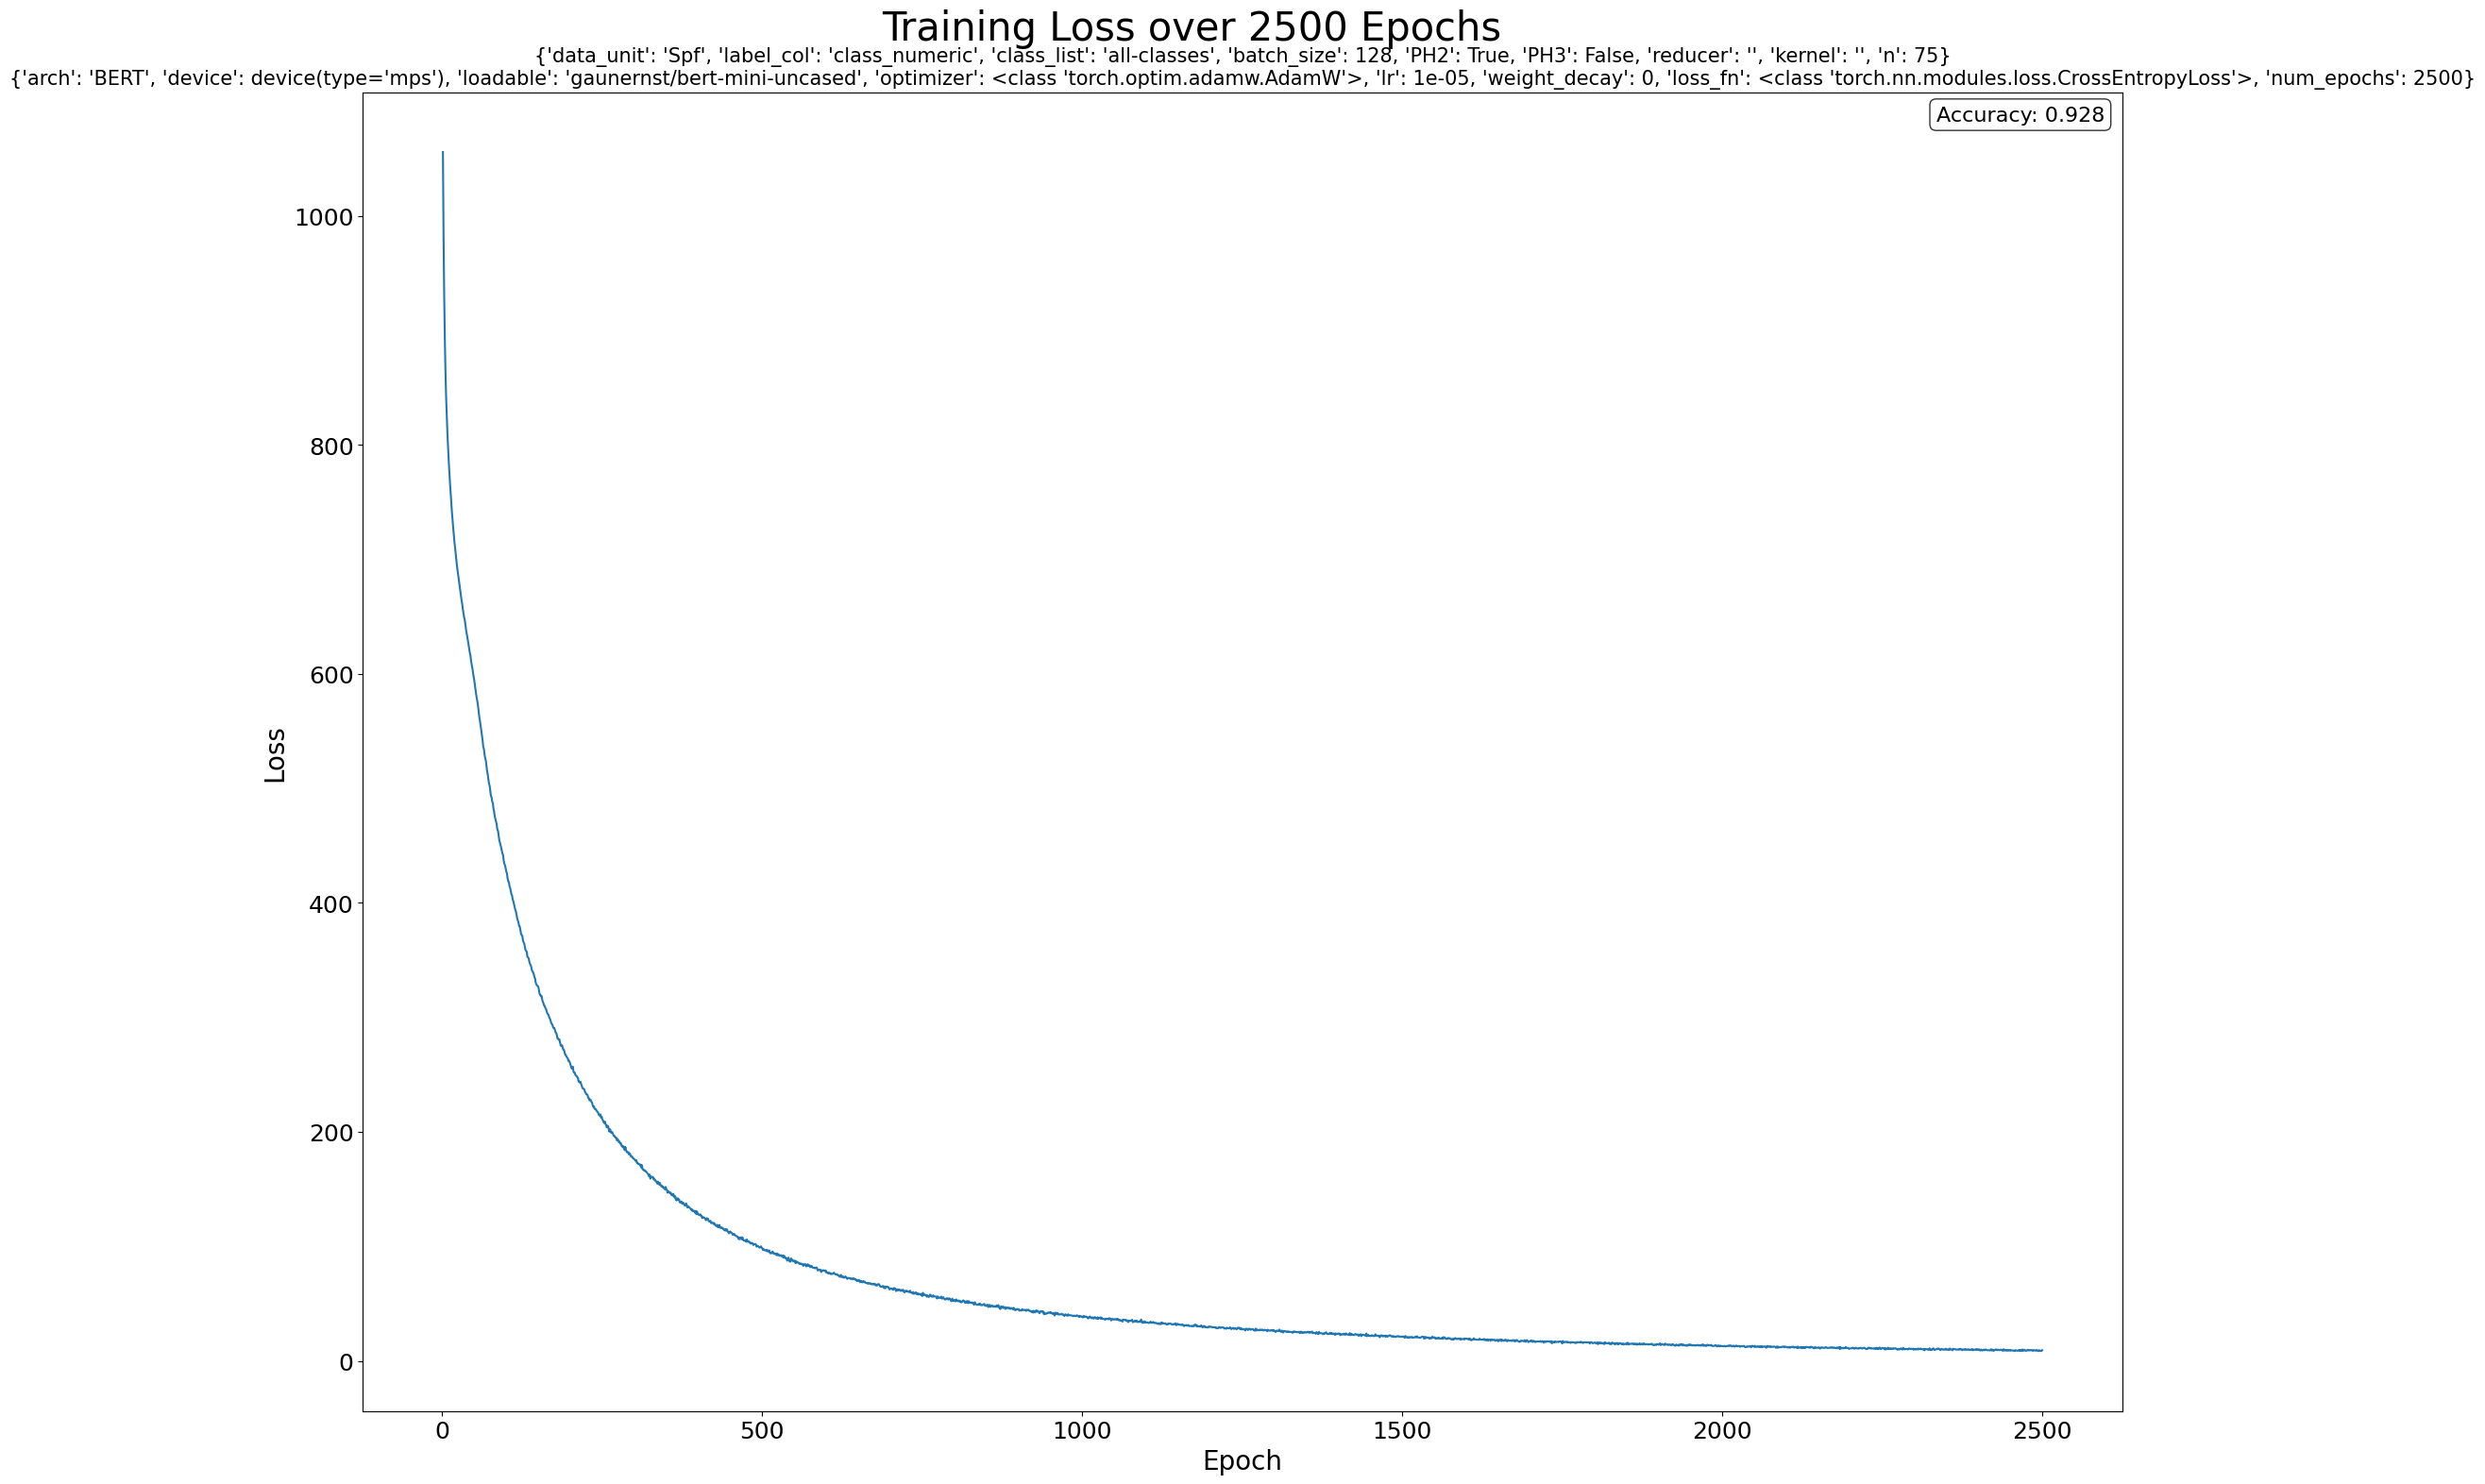

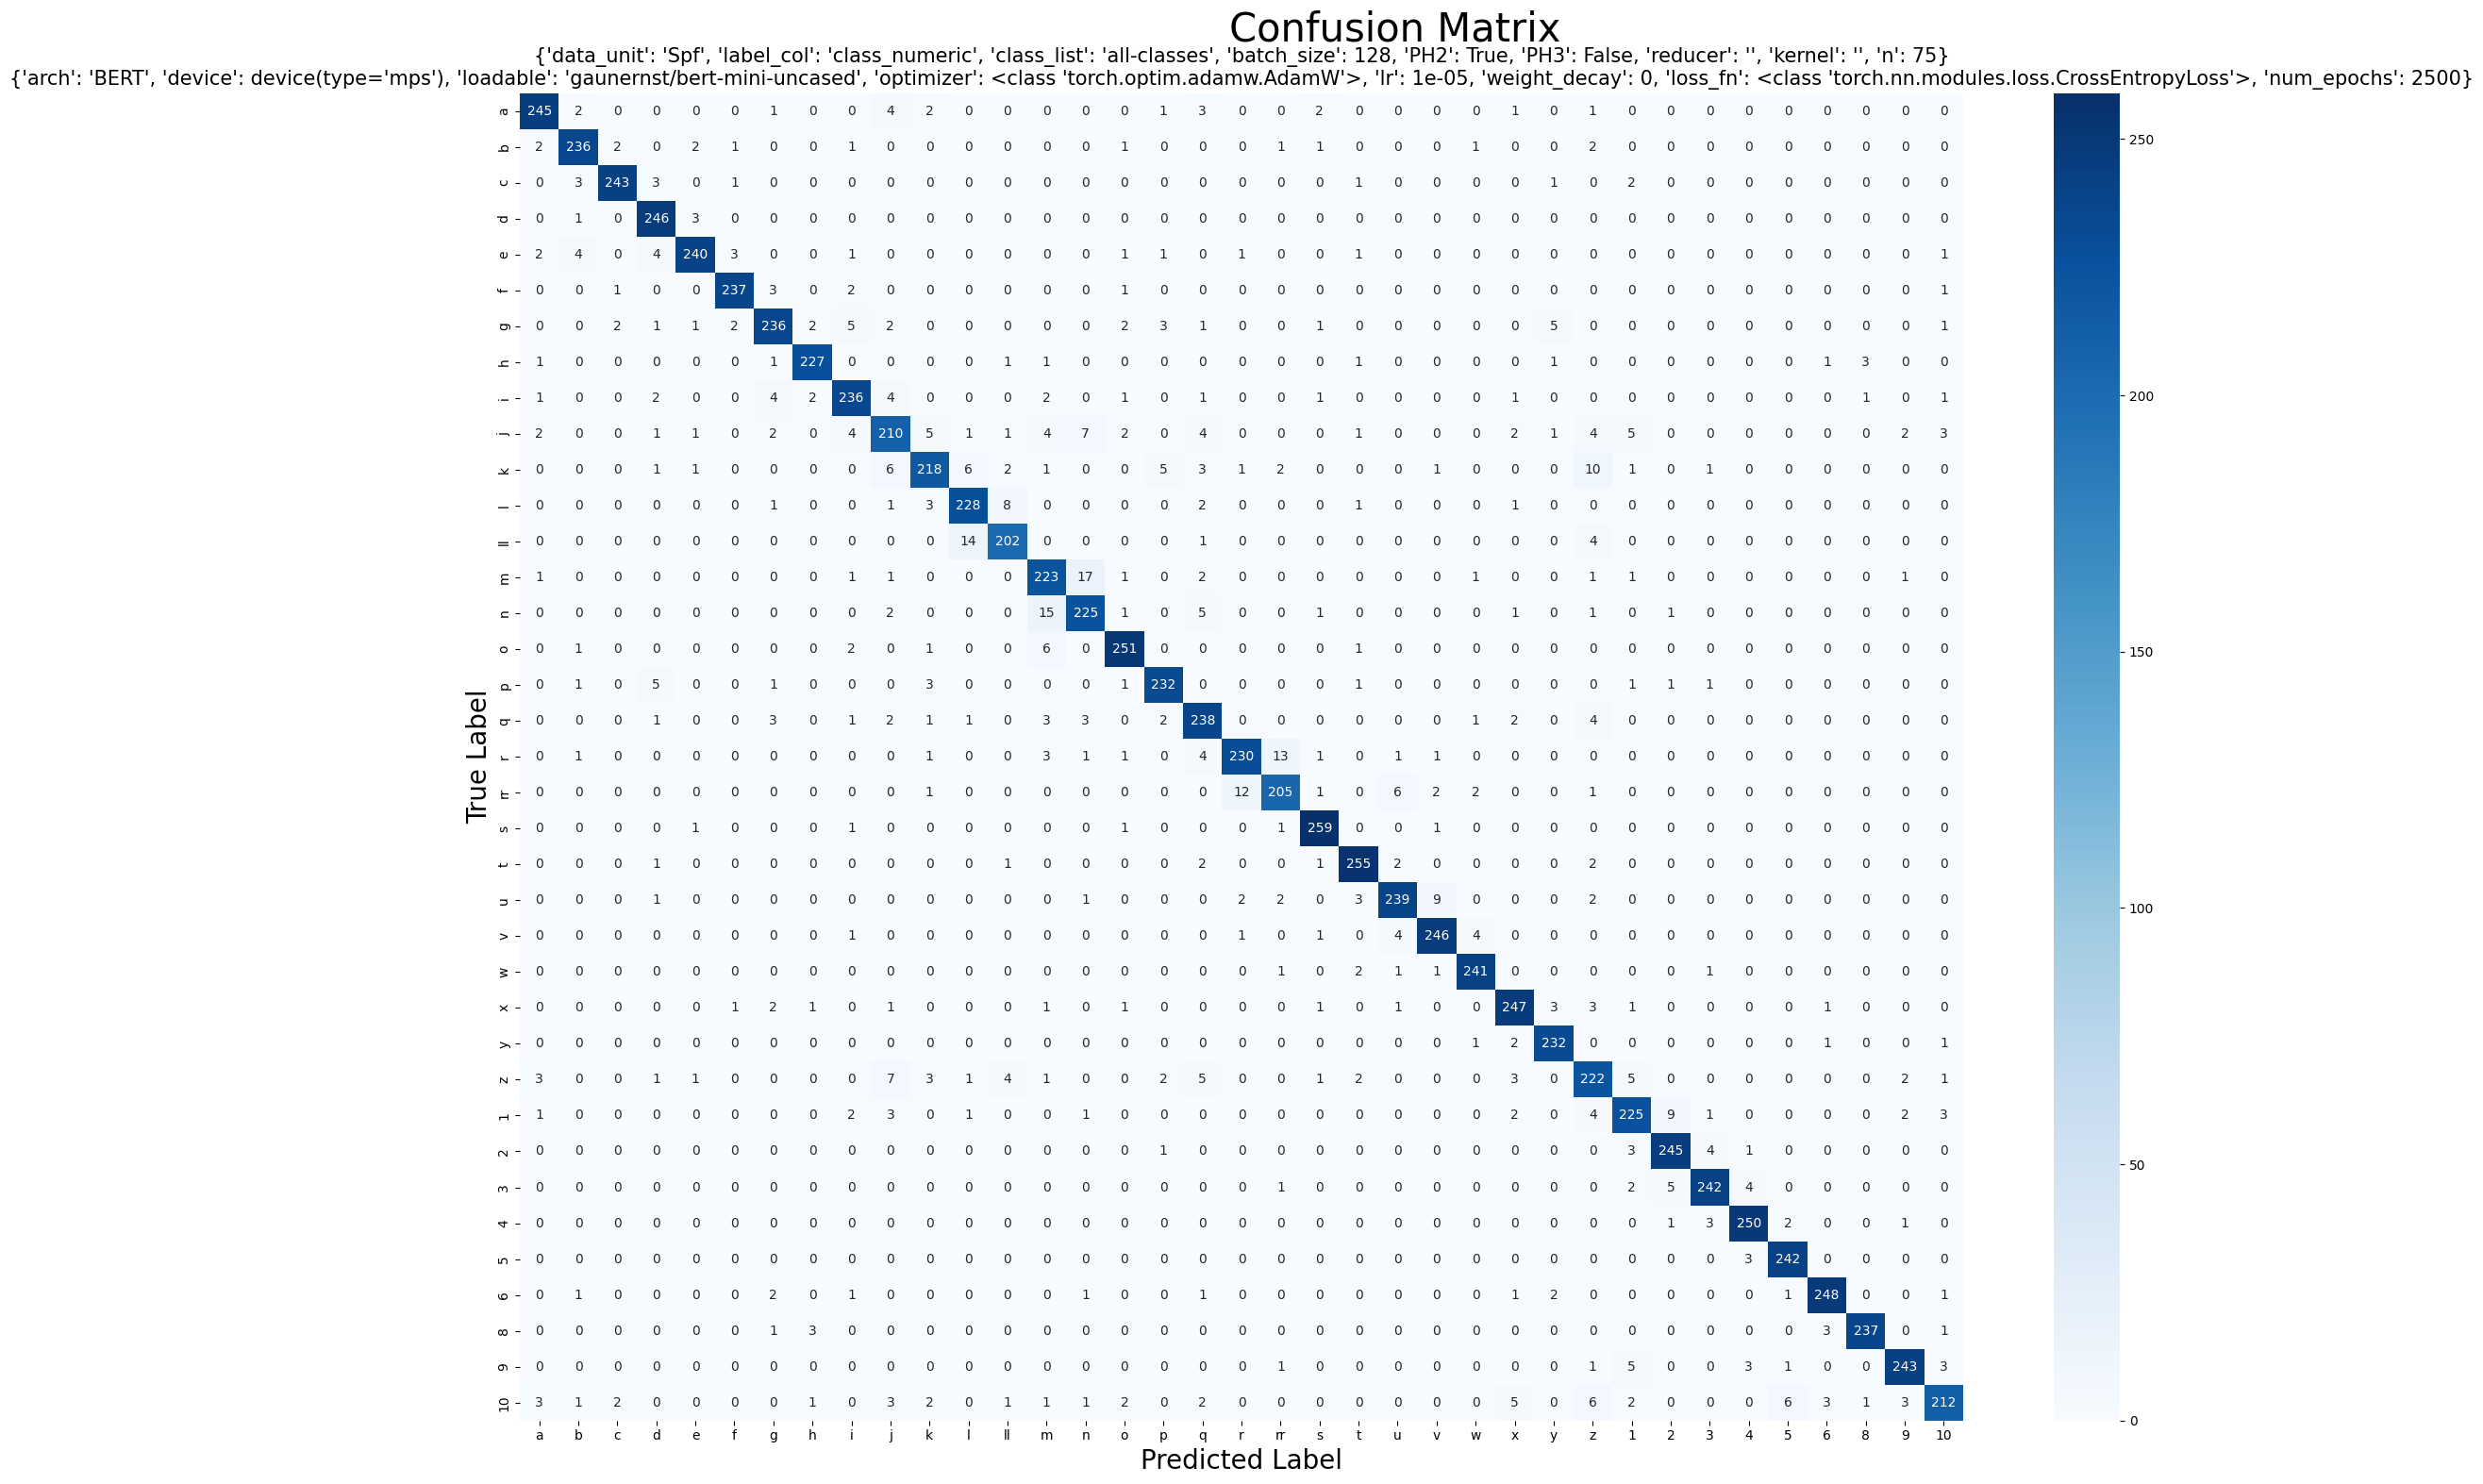

In [9]:
print(model.accuracy)
print(model.top2accuracy)
print(model.macro_f1)
print(model.macro_precision)
print(model.macro_recall)

model.show_loss()
model.show_confusion_matrix()

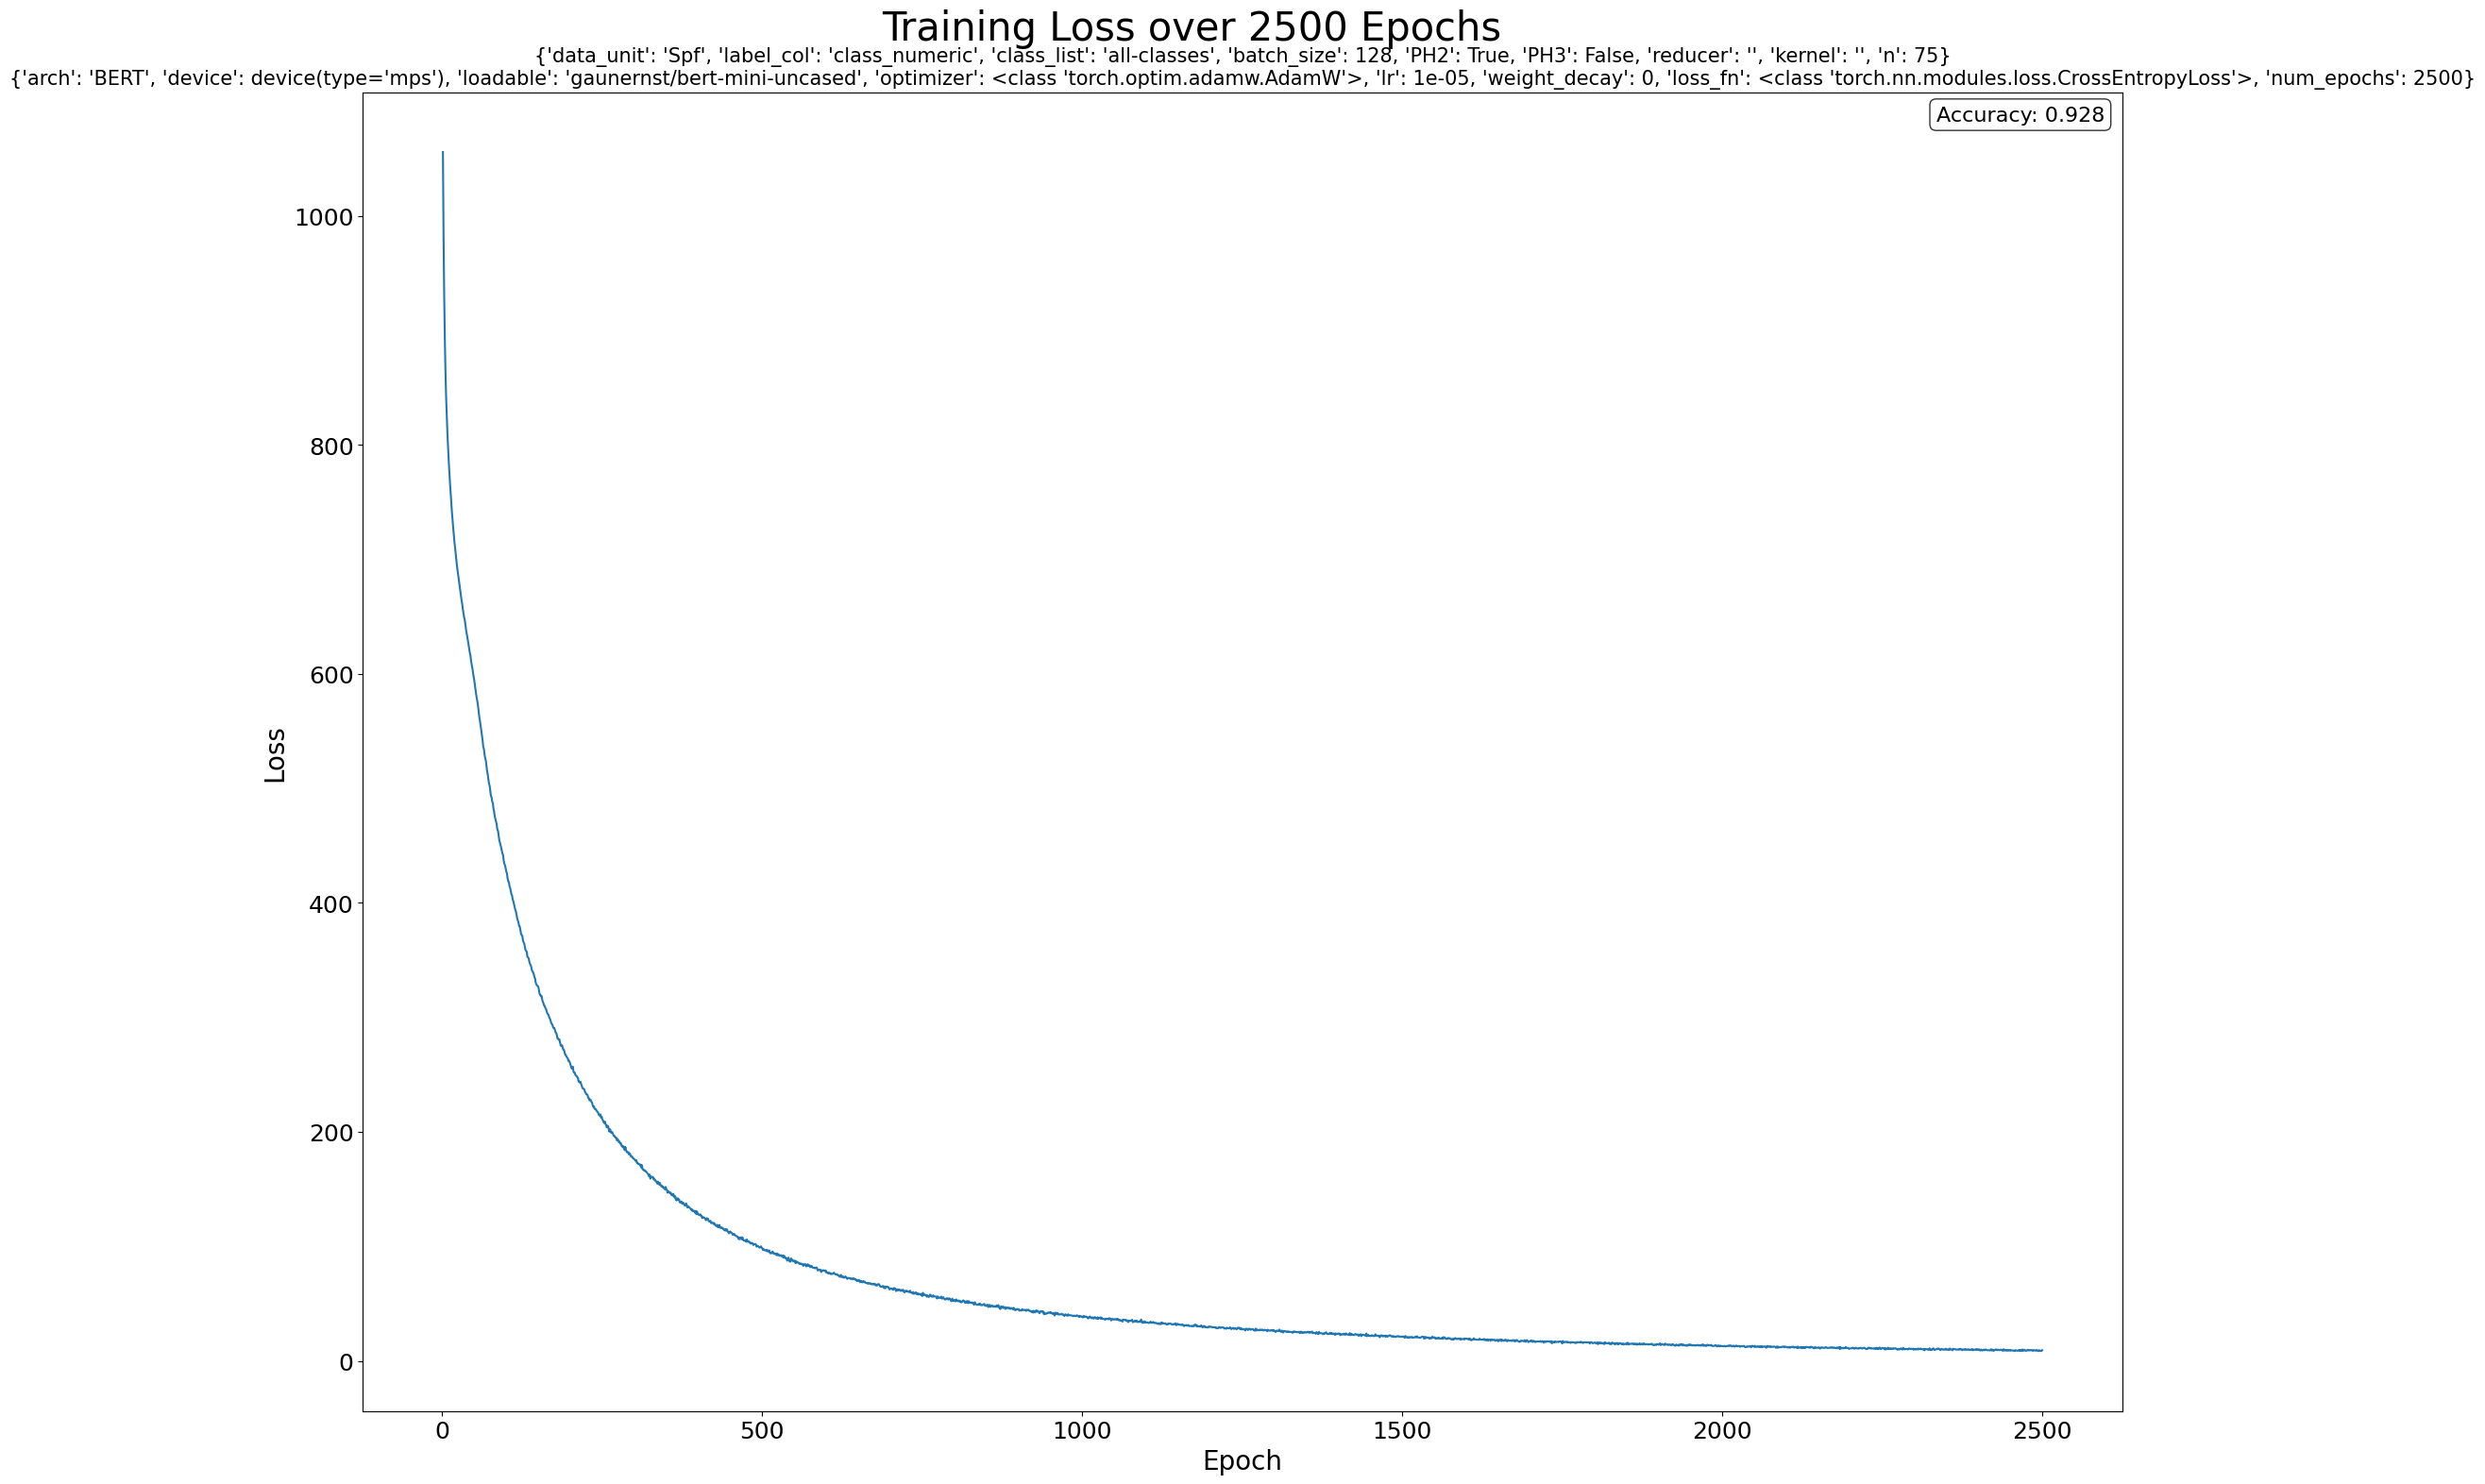

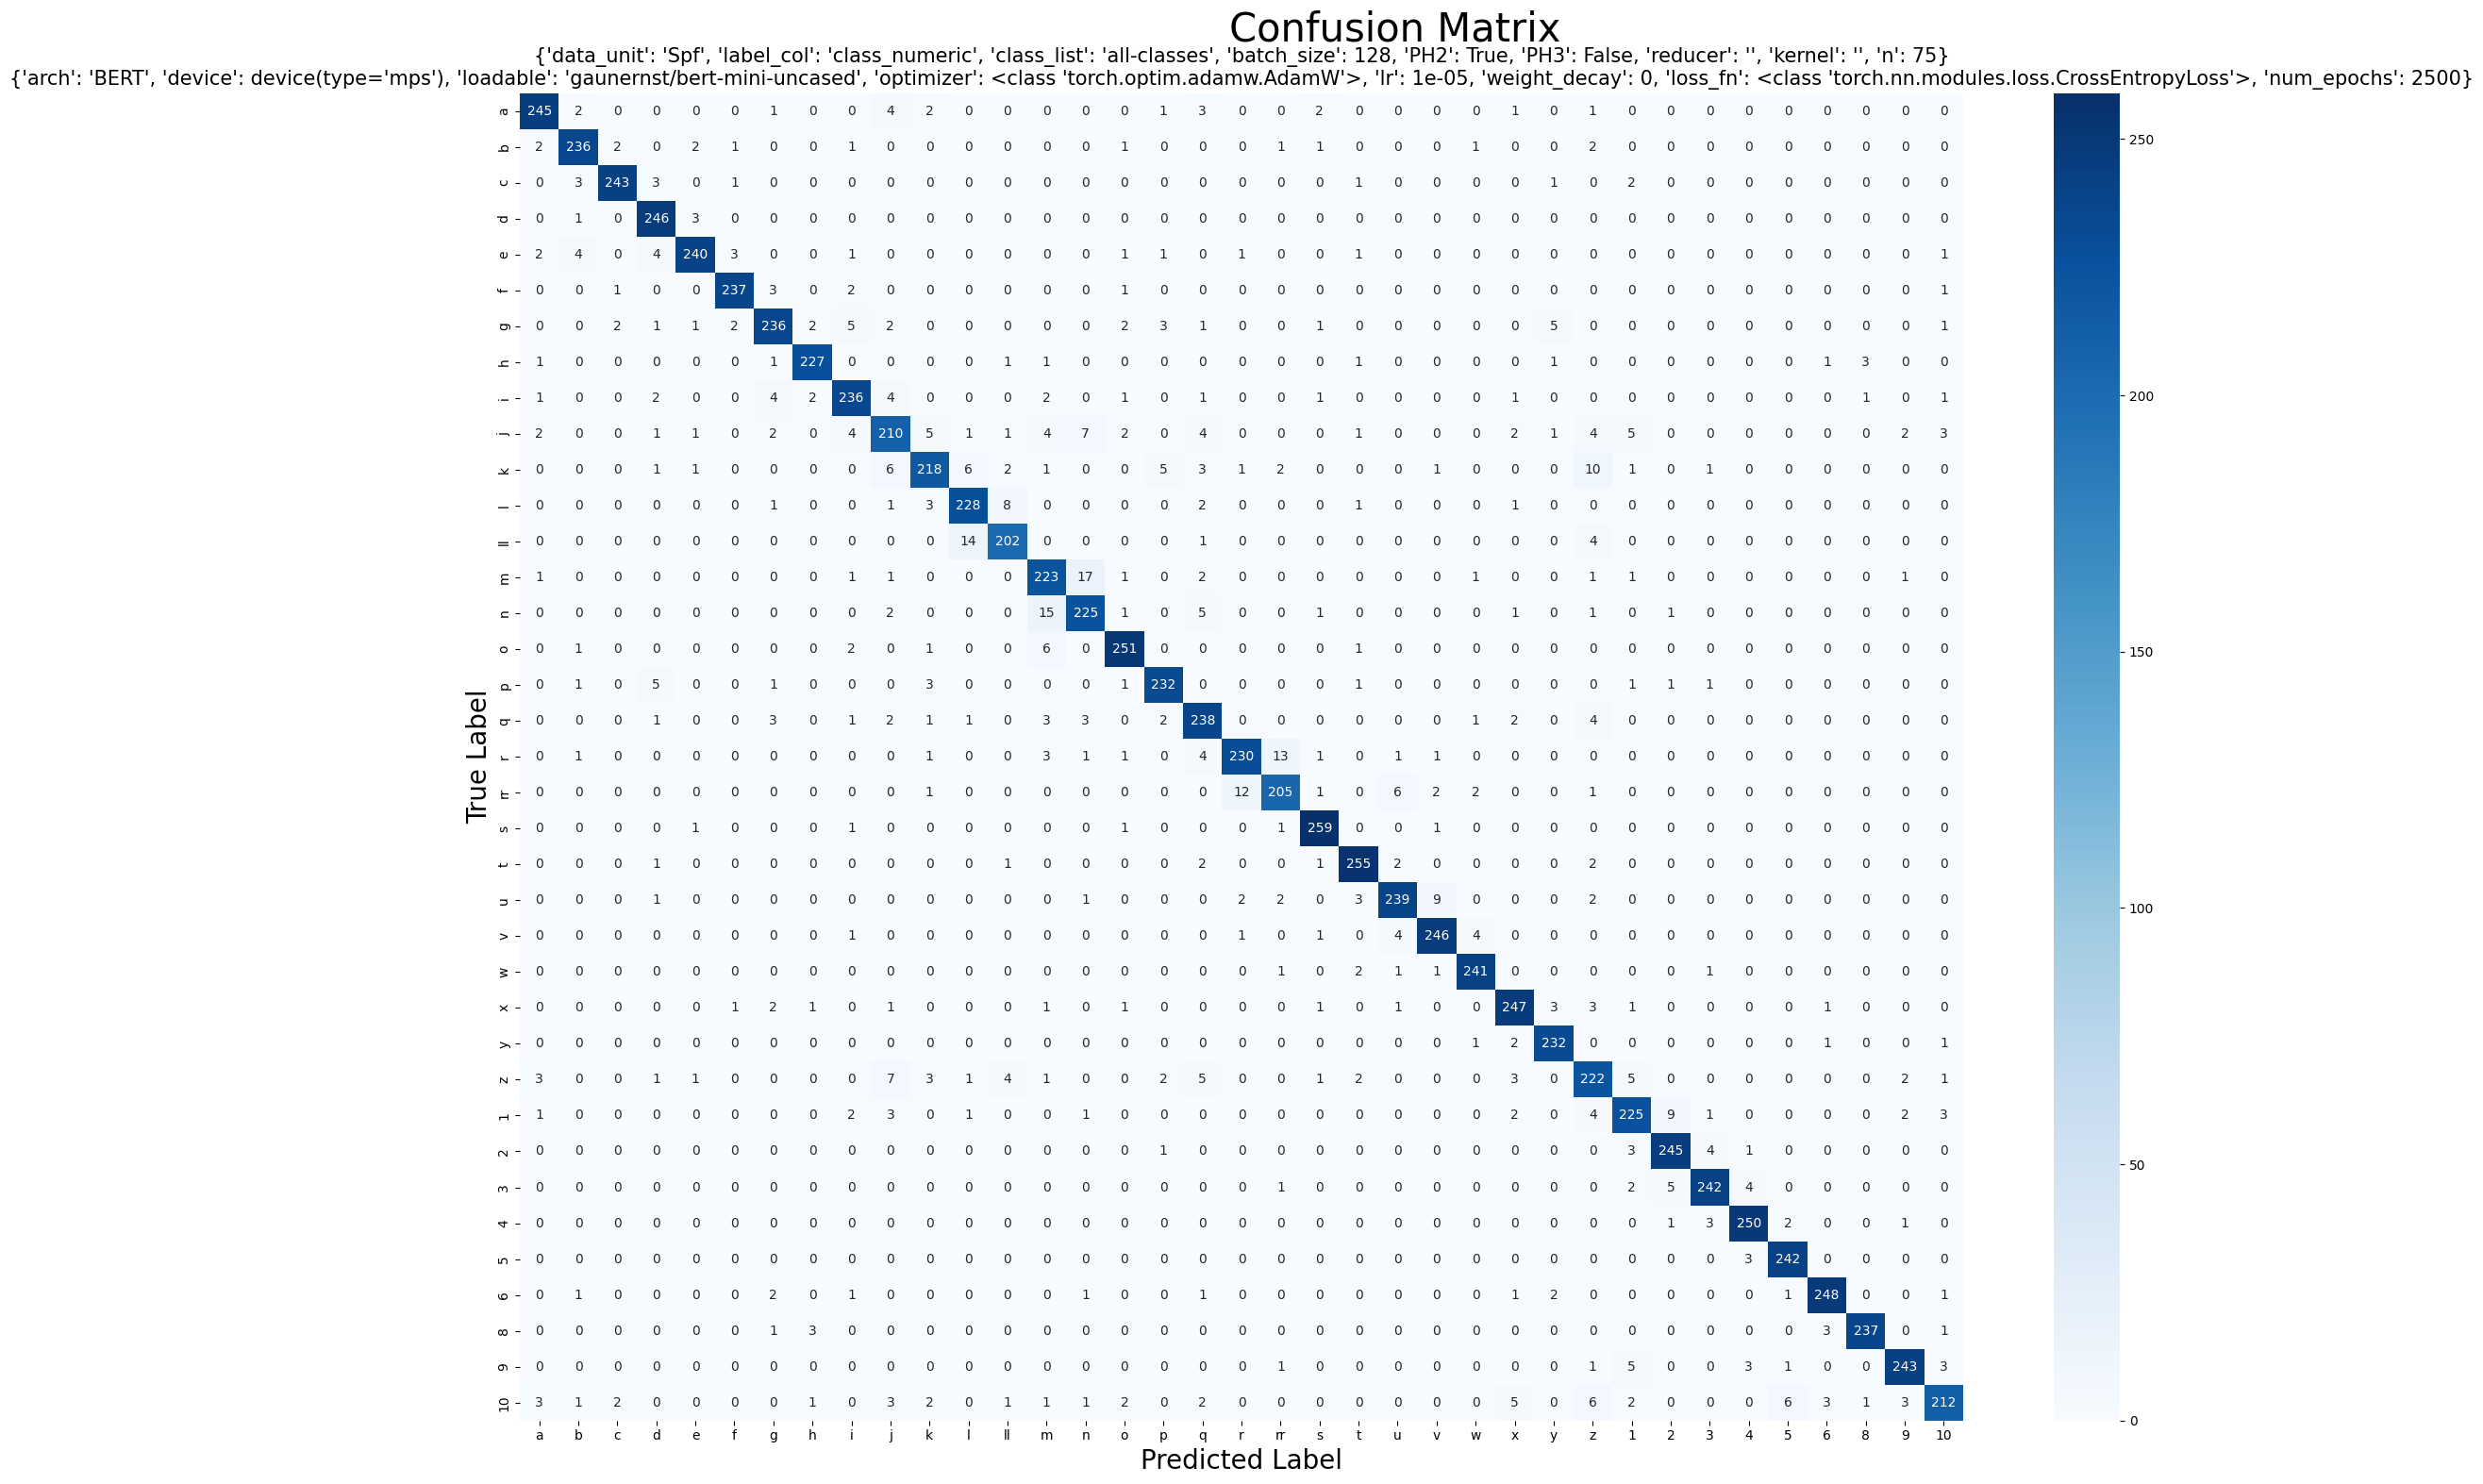

In [10]:
model.keep()
#bert.clean_bert()